#### This is a natural language processing machine learning model.
Natural language in the most simple words is the interaction between humans and computers through the human language. The NLP model is used for applying machine learning algorithms to text and language. 

#### The most common applications of NLP are seen in : 
* Voice Assistants like Google Home, Alexa, Siri , etc.
* Sentiment Analysis
* Speech Recognition
* Chatbots
* Summarizing Documents 
* Predicting an outcome based on the words in used in a sentence (Reviews , Announcements , Therapeutic Communication , etc.)

### The dataset I have used contains reviews of various cutomers after purchase based on their experience with the product. The _rating_ column is evaluated based on the _review text_ that the customer has written based on thier experience with the product and the services.

#### The dataset has been taken from [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/downloads/Womens%20Clothing%20E-Commerce%20Reviews.csv/1)

We will be creating the bag of words model which is the most popular reperesentation used in Natural Language Processing. It contains: 
* A vocabulary of known words. 
* A measure of the presence of those words

In [1]:
#Importing the basic libraries for data analysis.
import pandas as pd

Importing the dataset:

In [2]:
dataset = pd.read_csv('customerReviews.txt' , delimiter = '\t')
dataset = dataset.reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


The document has **tab seperated values** and the reason it is not a **CSV (comma seperated values)** is because the sentences in the _Review Text_  column may contain commas between various words and this can confuse the model. Hence we use a tab delimiter file to avoid that confusion.

In [3]:
dataset.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


As we can see that the dataset contains 11 columns. But we are mainly concerned will only two columns for our NLP model:
* Review Text : Which contains the review of the customers.
* Rating : Which contains the rating of the user out of 5.

In [4]:
#Remove all the rows where the Rating or Review Text valus are missing
dataset = dataset.dropna(subset = ['Review Text' , 'Rating'])
dataset = dataset.reset_index(drop = True)

reviewSet = dataset.iloc[ : , [4,5]]
reviewSet.head(5)

len(reviewSet)

22641

#### The next and most important step is to clean the text data so that the ML model can be implemented more effectively. 

This is involves a few steps:
* Only keeping the letters ie. removing numbers and special characters
* Converting all the letters into lower case.
* Removing unecessary words that do not comtribute to the output like preposition such as **in, or, the, and, this, that, etc**
* Identifying the root word of all the words (aka stemming)
* Creating the bag of words

#### Step 1 : Only keeping letters : 


In [5]:
#Length of the string before cleaning
beforeCleaning = len(reviewSet['Review Text'][0])
beforeCleaning

53

In [6]:
## Library that filters out all the content based on the regular expression pattern given.
import re 
review = re.sub("[^a-zA-Z]" , ' ' , reviewSet['Review Text'][0]) # For the first Review Text 
review

'Absolutely wonderful   silky and sexy and comfortable'

As we can see that only the letter have stayed in the review compared to the _Review Text_ in the dataset (the 1st response).  

#### Step 2 : Converting all the letters to lower case : 

In [7]:
review = review.lower()
review

'absolutely wonderful   silky and sexy and comfortable'

All the letters have been converted to lower case letters

#### Step 3: Removing all the insignificant words : 
This can be done using popular libraries such as NLTK which is a popular natural langauage processing library in python 

In [8]:
import nltk
#Stopwords is a package that contains all the unecessary words that will be used to filter out those words.
# nltk.download('stopwords')

In [9]:
#Importing the library and all the necessary components
from nltk.corpus import stopwords #Importing the stopwords class

We need to split the words of the string into a list since we have to go through every word seperately and check if the it matches any of the words in the stopwords package.

In [10]:
review = review.split()

In [11]:
review

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']

We have converted rthe string into a list of individual words. In the output above I have displayed only 10 words but there the list will contain as many words as the string **review** has.

We will then use a **For-in loop** to go through each word in the list and check if the word exists in the stopwords package.
If the word exists in the stopwords package then it doesn not add it to the review list

In [12]:
review = [word for word in review if not word in set(stopwords.words('english'))]
review

['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']

As we can see that the uncessary words like **I, and, this, of, have,** etc have been removed.

#### Step 4 : Finding out the root words of all the words in the list (aka. stemming)

In [13]:
#Importing the library that contains the root words of the english words.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review]
review

['absolut', 'wonder', 'silki', 'sexi', 'comfort']

#### Converting the list back to string

In [14]:
review = ' '.join(review)
review

'absolut wonder silki sexi comfort'

The list has been converted with to a string. 

In [15]:
#Length of string after cleaning
afterCleaning = len(review) 
afterCleaning

33

As we can see that the length of the string has decreased from 53 to 33. 

#### We now have a clean string for the first review. However we have to do this for all the reviews hence we will use a for loop to repeat the process for all the reviews

In [16]:
#Storing the number of rows for the dataset *reviewSet*
nRows = len(reviewSet.index)
nRows

22641

In [17]:
cleanedReviews = [] #Creating an empty array (vector) that will contain all the clean strings.

for i in range(0,nRows): #The range is from 0 to nRows(which in our case is 19662).
    review = re.sub("[^a-zA-Z]" , ' ' , reviewSet['Review Text'][i]) #Put i in instead of row the number.(STEP 1)
    review = review.lower() #Step 2
    review = review.split() #Step 3
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #Step 3
    review = ' '.join(review)
    cleanedReviews.append(review)

In [18]:
cleanedReviews[0 : 5]

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt']

Hence cleanedReviews contains the list of all the cleaned reviews. 
Let us now calculate the word count for all the reviews in the cleanedReview list.

In [19]:
wc = ' '.join(cleanedReviews)

In [20]:
wc = wc.split()

In [21]:
#Importing the counter library to calculate the word count
from collections import Counter
counter=Counter(wc)

The counter variable has stored the word count for all the words used in the review.
Let us see plot the 50 most common word used in the reviews against thier word counts

In [22]:
wordCount = pd.DataFrame(counter.most_common(10) , 
                        columns = ['Word' , 'Word Count'])
wordCount

,Word,Word Count
0,dress,12187
1,fit,11514
2,love,11395
3,size,10723
4,look,9354
5,top,8375
6,wear,8075
7,like,7876
8,color,7300
9,great,6118


<IPython.core.display.Javascript object>


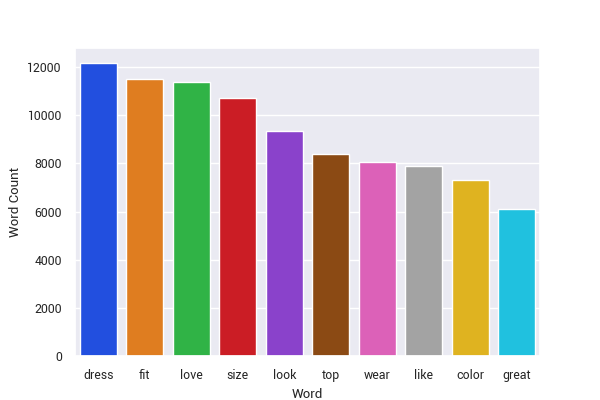

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

plt.figure(figsize=(6,4))
sns.set(style='darkgrid' , palette = 'bright' , font = 'Roboto' , font_scale = 0.8)
ax = sns.barplot(x="Word",y="Word Count", data=wordCount.head(10))

In [24]:
new = {'Cleaned Reviews' : cleanedReviews , 'Ratings' : reviewSet['Rating']}
newReviews = pd.DataFrame(data = new)
newReviews.head(7)

,Cleaned Reviews,Ratings
0,absolut wonder silki sexi comfort,4
1,love dress sooo pretti happen find store glad ...,5
2,high hope dress realli want work initi order p...,3
3,love love love jumpsuit fun flirti fabul everi...,5
4,shirt flatter due adjust front tie perfect len...,5
5,love traci rees dress one petit feet tall usua...,2
6,ade basket hte last mintu see would look like ...,5


#### Let us categorize the data into a binary output where all the ratings equal and below 3 are given 0 (Negative) and all the rating of above 3 are given 1 (Positive).  

In [25]:
for i in range(0,len(newReviews.index)): 
    if (newReviews.iloc[ i , 1] > 3):
        newReviews.iloc[ i , 1] = 1
    elif (newReviews.iloc[ i , 1] <= 3):
        newReviews.iloc[ i , 1] = 0

In [26]:
newReviews['Ratings'].value_counts()

1    17448
0     5193
Name: Ratings, dtype: int64

#### Now we will create the _Bag of Words_ which will contain all the words where each word is put in a seperate column of thier own and the corresponding row will contain 0 (negative) or 1 (positive) depending on weather the word belongs to the review which was marked as positive or negative in the _newReview_  dataset. You must have figured out by now that we will be getting a large number of columns and many many 0's. Hence the matrix formed will be a sparce matrix. 

In [27]:
X = newReviews['Cleaned Reviews'].values #Input
y = newReviews['Ratings'].values #Output

#### Step 5: Creating the bag of words:

In [28]:
#The library will convert a collection of text documents into a matrix of token counts. 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

We will use the **bag of words** to train the machine learning model. The NLP model basically a classification model with alot of columns (for every word) and N rows (participants).

The most commonly used algorithms for **Natural Language Processing** are:
* Naive Bayes Algrithm
* Decision Tree Algorithm
* Random Forest Classification

But ofcoursre you can experiment with all the models and determing which would be the best one.

#### We will be using the Naive Bayes Algorithm to make our model.

## Gaussian Naive Bayes Model:
The first step to divide the dataset into training and testing sets.

In [29]:
from sklearn.model_selection import train_test_split
#We have divided the dataset into 30% test size and 70% training size.
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30) 

In [30]:
#Importing the Gaussian Naive Bayes library:
from sklearn.naive_bayes import MultinomialNB 
classifier = MultinomialNB()
classifier.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[1093  447]
 [ 453 4800]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1540
           1       0.91      0.91      0.91      5253

    accuracy                           0.87      6793
   macro avg       0.81      0.81      0.81      6793
weighted avg       0.87      0.87      0.87      6793



The classification report states 71% accuracy for negative reviews and 91% accuracy for positive reviews.

The results we have recieved are pretty good for the size of the dataset we had and the amount of data cleaning that we did. Ofcourse we can improve the model by further cleaning the data and experimenting with different algorithms or tuning various parameters. 

In [34]:
def cleansing(newReview):
    newReview = re.sub("[^a-zA-Z]" , ' ' , newReview)
    newReview = newReview.lower() 
    newReview = newReview.split() 
    newReview = [ps.stem(word) for word in newReview if not word in set(stopwords.words('english'))]
    newReview = ' '.join(newReview)
    return newReview

#### Let us test our model with new reviews

### Case 1 :

In [35]:
newReview = input("Enter your reivew")
'The review you have entered is: ' + newReview

Enter your reivewThis is a very good Tshirt. Really loved the design and the fitting is perfect. Very good service and would definitly recommend to more people.


'The review you have entered is: This is a very good Tshirt. Really loved the design and the fitting is perfect. Very good service and would definitly recommend to more people.'

In [36]:
cleansing(newReview)

'good tshirt realli love design fit perfect good servic would definitli recommend peopl'

In [37]:
newReview = cv.transform([newReview])

In [38]:
value = classifier.predict(newReview)

In [39]:
value[0]

1

#### As we can see that our model has predicted that the new use review was positive.

### Case 2 :

In [40]:
newReview = input("Enter your reivew")
'The review you have entered is :\n' + newReview

Enter your reivewThe top was not of the correct size and they sent a different color. Was very dissapointed in the product and i will not shop from here again.


'The review you have entered is :\nThe top was not of the correct size and they sent a different color. Was very dissapointed in the product and i will not shop from here again.'

In [41]:
cleansing(newReview)

'top correct size sent differ color dissapoint product shop'

In [42]:
newReview = cv.transform([newReview])

In [43]:
value = classifier.predict(newReview)

In [44]:
value[0]

0

#### As we can see that our model has predicted that the new use review was negative.

Hence our model has predicted the right values and is now complete. 
